In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Carregando os dados.
penguins = pd.read_csv("penguins.csv")

#Visualizando os dados.
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


# O conjunto de dados contém as seguintes colunas:

- CulmenLength: O comprimento em mm do culmen do pinguim (bico).
- CulmenDepth: A profundidade em mm do culmen do pinguim.
- FlipperLength: O comprimento em mm da nadadeira do pinguim.
- BodyMass: A massa corporal do pinguim em gramas.
- Species: Um valor inteiro que representa a espécie do pinguim.

In [9]:
# Nome das Espécies.

penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(penguins.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 39.2 19.6 195.0 4675.0 0 ] Adelie
[ 49.5 16.2 229.0 5800.0 1 ] Gentoo
[ 46.4 18.6 190.0 3450.0 2 ] Chinstrap
[ 35.9 16.6 190.0 3050.0 0 ] Adelie
[ 52.8 20.0 205.0 4550.0 2 ] Chinstrap
[ 46.3 15.8 215.0 5050.0 1 ] Gentoo
[ 44.1 19.7 196.0 4400.0 0 ] Adelie
[ 39.0 17.1 191.0 3050.0 0 ] Adelie
[ 40.2 20.1 200.0 3975.0 0 ] Adelie
[ 52.0 19.0 197.0 4150.0 2 ] Chinstrap


In [10]:
# Contando valores ausentes.
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [11]:
# Visualizando linhas com valores ausentes.
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [12]:
# Dropando linhas com valores ausentes.
penguins = penguins.dropna()

# Confirmando se os valores ausentes foram excluídos.
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

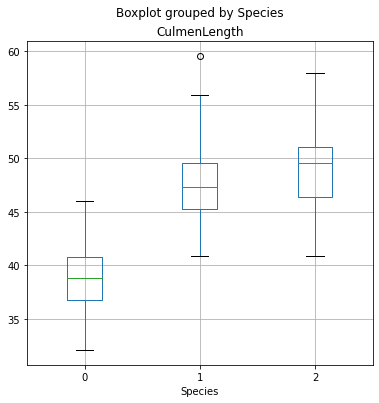

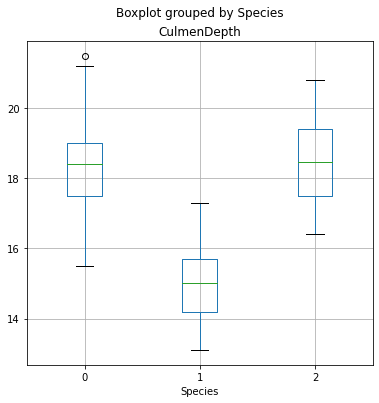

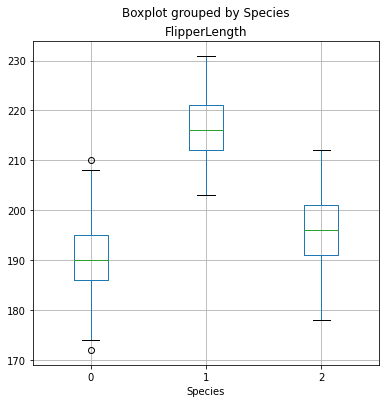

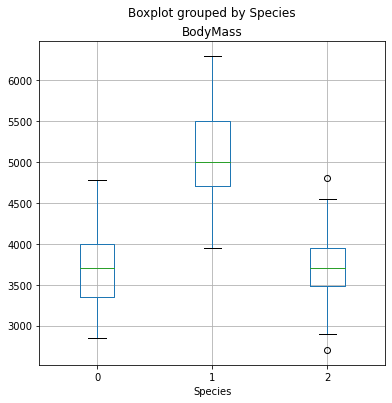

In [14]:
penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)

In [16]:
# Separando features e label.
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Dividindo os dados em Treino e Teste.
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y, test_size=0.30, random_state=0, stratify=penguins_y)

print ('Dados de Treinamento: %d, Dados de Teste: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Dados de Treinamento: 239, Dados de Teste: 103 



In [18]:
# Definindo o regularization rate
reg = 0.1

# Treinando um modelo de regressão ligistica.
multi_model = LogisticRegression(C = 1/reg, solver = "lbfgs", multi_class = "auto", max_iter=10000).fit(x_penguin_train, y_penguin_train)
print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [19]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Labels preditos: ', penguin_predictions[:15])
print('Labels reais: ' ,y_penguin_test[:15])

Labels preditos:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Labels reais:  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [21]:
print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [24]:
# Métricas gerais

print("Acurácia Geral:",accuracy_score(y_penguin_test, penguin_predictions))
print("Precisão Geral:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Recall geral:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Acurácia Geral: 0.970873786407767
Precisão Geral: 0.9688405797101449
Recall geral: 0.9608465608465608


In [26]:
# Matriz de confusão

mdc = confusion_matrix(y_penguin_test, penguin_predictions)
print(mdc)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


Text(0, 0.5, 'Espécie Real')

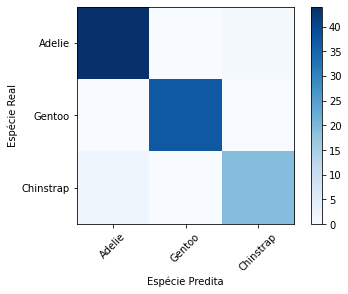

In [29]:
plt.imshow(mdc, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Espécie Predita")
plt.ylabel("Espécie Real")

# Os quadrados mais escuros no gráfico da matriz de confusão indicam um grande número de casos.

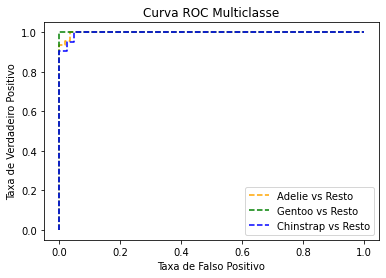

In [32]:
# Obter pontuações de probabilidade de classe
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Obter métricas ROC para cada classe
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)

# Plotando o gráfico ROC
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Resto')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Resto')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Resto')
plt.title('Curva ROC Multiclasse')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc='best')

In [34]:
# Para quantificar o desempenho do ROC, você pode calcular uma área agregada sob a pontuação da curva cuja média é calculada em todas as curvas OVR.

auc = roc_auc_score(y_penguin_test, penguin_prob, multi_class='ovr')
print('AUC Média:', auc)

AUC Média: 0.9981999902100828
